# <font color='red'>Examen Data Science</font>

![title](https://github.com/martinezbrenda/Test_Ingreso_Santander/blob/main/img/st.jpeg?raw=1)

Escribir su Nombre y Apellido a continuación

Nombre:
Apellido:

# Sección A - Desafíos Técnicos

## <font color='red'>1 -Python</font>

### py-1) Vectores, Clases y Objetos

Desarrollar una clase en python que, al instanciar, reciba un vector **weights** y que tenga la siguiente funcionalidad:


* Desarrollar el método **set_weights** que pueda sobrescribir los valores del atributo `weights`
* Desarrollar el método **dot** que permita multiplicar el vector `weigths` por un vector de entrada. (producto escalar)
* Desarrollar el método **predict** que utilice la salida del método dot y lo pasé por la función ReLu. <a href=https://es.wikipedia.org/wiki/Rectificador_(redes_neuronales)>Función Relu</a>  
* Desarrollar otra clase que herede el comportamiento de la clase anterior y que además:
  * Reciba un parametro adicional: `bias` (int64)
  * Redefina el método **dot** y al producto le sume el atributo `bias`

In [ ]:
import numpy as np
weights = np.array([-4,3,1,-2])

In [ ]:
# Escriba aquí su respuesta

### py-2) Unit test

Desarrollar un test unitario que permita evaluar los métodos de la clase base.

In [ ]:
# Escriba aquí su respuesta

## <font color='red'>2- SQL</font>

Para el siguiente ejercicio se tiene una base de datos que tiene el siguiente DER:

![title](https://github.com/martinezbrenda/Test_Ingreso_Santander/blob/main/img/img_der.png?raw=1)


* Persona (id) puede tener muchas Tarjetas (se relaciona a través de `id_titular`)
* Una Compra siempre es realizada con una única tarjeta
* (EXTRA) La tabla Compra posee un histórico de más de 10 años y varias decenas de millones de registros por lo que las consultas a esta entidad pueden tardar varios minutos si no están correctamente optimizadas.

### sql-1) Query

Obtener los número de tarjeta que no tengan consumos en el último mes pero que pertenecen a personas que hayan comprado al menos un total de $5000 en el último mes en los rubros (FARMACIA y SUPERMERCADOS) en conjunto. (Si es posible, tener en cuenta el punto EXTRA mencionado previamente).


In [ ]:
# Escriba aquí su respuesta

### sql-2) Explicar el resultado de la siguiente query

* ¿Qué se obtiene cómo resultado?
* ¿Quiénes son P1, P2 y P3?
* (EXTRA) Si supiera que la tabla persona se carga completa todos los días del año, cada día teniendo una foto guardada con una valor distinto dentro de una variable llamada partition_date. Por ej: uno puede consultar todos los ids de la fecha 2021-05-27 o de la fecha que quiera. ¿Cambiaría algo la siguiente query si quisiera obtener el mismo resultado para la última fecha disponible?


 <font color='blue'>**SELECT**</font> P1.dni,  <font color='red'>COUNT</font> ( <font color='red'>DISTINCT</font>  ( P2.id ) )\
<font color='blue'>**FROM** </font> Persona P1 \
<font color='blue'>**JOIN**</font> Persona P2 on P1.id_padre = P2.id \
<font color='blue'>**JOIN**</font>  Persona P3 on P2.id_padre = P3.id \
<font color='blue'>**WHERE**</font>  P3.sexo = 'MASCULINO' \
<font color='blue'>**GROUP BY**</font>  P1.dni

In [ ]:
# Escriba aquí su respuesta

# Sección B - Desafío Machine Learning

#### Enunciado Parte Práctica

El ejercicio consiste en realizar una clasificación de intención de compra online. Para ello se dispondrá de un dataset **online_shoppers_intention.csv** el cual consta de **12.330** registros y **18** columnas
* El target es la columnna **Revenue**

Para completar el desafío se deberá:
* Realizar un análisis exploratorio de los datos
* Explicar la elección del algoritmo utilizado
* Explicar los resultados obtenidos (Métricas)
* Explicar cuales son las variables que más afectan a la predicción.
* Contestar las siguientes preguntas:
  * *¿El modelo final elegido es bueno? Justificar*
  * *¿Existe overfitting o underfitting?*

⚠️**ACLARACIONES:**⚠️

- Se tendrá en cuenta la prolijidad del informe.
- Se tendrá en cuenta la legibilidad del código.
- De ser necesario, dejar asentado los supuestos utilizados por escrito.

## Analisis exploratorio de datos
Realizamos el primer aproach a los datos

In [ ]:
!pip install --upgrade numpy pandas
!pip install -U ppscore

In [106]:
!pip install --upgrade --force-reinstall pandas

  Using cached pandas-2.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
  Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached pandas-2.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.4 MB)
Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 26.0 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installatio

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps

In [81]:
## Lectura del data set y muestreo

df = pd.read_csv("https://raw.githubusercontent.com/martinezbrenda/Test_Ingreso_Santander/main/online_shoppers_intention.csv")
# Inspección rápida de las primeras filas, columnas y tamano
print("Total filas:", df.shape[0])
print("Total columnas:", df.shape[1])
df.head(6)

Total filas: 12330
Total columnas: 18


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False


In [47]:
# Estructura del DataFrame para ver tipos y cantidades

print("\nEstructura:")
print(df.info())

print("\nResumen estadistico")
print(df.describe())


Estructura:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficTy

Podemos observar que tenemos 4 tipos de variables que se reparten en 7 int 7 float 2 object y 2 bool.

### Tranformacion de variables
Luego de las observaciones realizadas anteriormente vamos a analizar como modificar ciertas columnas para estas puedan ser utilizadas. Estas son:


*   Weekend
*   VisitorType
*   Month
* Revenue




In [82]:
print(df['VisitorType'].unique())
df.VisitorType.value_counts()

['Returning_Visitor' 'New_Visitor' 'Other']


,count
VisitorType,
Returning_Visitor,10551
New_Visitor,1694
Other,85


Podemos observar que visitor type no es una variable binaria, pero debido a que la categoria "Other" tiene muy pocos registros, la eliminaremos y concideraremos unicamente si el visitante es nuevo o recurrente.

In [83]:
df['VisitorType'] = df['VisitorType'].apply( lambda x: x if x in ['Returning_Visitor', 'New_Visitor'] else 'New_Visitor')
df['VisitorType'] = df['VisitorType'].apply(lambda x: 0 if x == 'Returning_Visitor' else 1)

Convertimos a las columnas Weekend y Revenue en int

In [84]:
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

Ahora modificaremos la columna Month para que deje de ser del tipo string.

In [85]:
print(df['Month'].unique()) # Tenemos que ver como este data set tiene los meses escritos porque si no el mapeo no va a funcionar y va a dejar la columna Month con valores en nulo
month_map = {
    'Feb': 2, 'Mar': 3, 'May': 5, 'June': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10,
    'Nov': 11, 'Dec': 12
}
df['Month'] = df['Month'].map(month_map)

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


In [86]:
df.TrafficType.value_counts()

,count
TrafficType,
2,3913
1,2451
3,2052
4,1069
13,738
10,450
6,444
8,343
5,260


Podemos observar que tenemos demasiados tipos de trafico y muchos de ellos ni quiera tienen una cantidad significativa de registros asociados. Ahora procederemos a buscar los 10 mas frecuentes (ya que son 10 las categorias que superan los 200 registros) y reemplazar a todos los que no pertenezcan a ese top por la categoria "Other"

In [87]:
top10= df.TrafficType.value_counts().index[:10]
df['TrafficType']= np.where(df['TrafficType'].isin(top10), df['TrafficType'], 0)
df.TrafficType.value_counts()

,count
TrafficType,
2,3913
1,2451
3,2052
4,1069
13,738
10,450
6,444
0,363
8,343


In [89]:
df.Browser.value_counts()

,count
Browser,
2,7961
1,2462
4,736
5,467
6,174
10,163
8,135
3,105
13,61


De la misma manera que en el caso anterior, vamos a realizar lo mismo con la variable Browser

In [90]:
top8 = df['Browser'].value_counts().index[:8]
df['Browser'] = np.where(df['Browser'].isin(top8), df['Browser'], 0)
df.Browser.value_counts()

,count
Browser,
2,7961
1,2462
4,736
5,467
6,174
10,163
8,135
0,127
3,105


In [91]:
df.OperatingSystems.value_counts()

,count
OperatingSystems,
2,6601
1,2585
3,2555
4,478
8,79
6,19
7,7
5,6


In [93]:
top3 = df['OperatingSystems'].value_counts().index[:3]
df['OperatingSystems'] = np.where(df['OperatingSystems'].isin(top3), df['OperatingSystems'], 0)
df.OperatingSystems.value_counts()

,count
OperatingSystems,
2,6601
1,2585
3,2555
0,589


Al contabilizar el contenido del resto de las columnas no concideramos necesario realizar modificaciones en este momento ahora verificaremos las modifcaciones realizadas

In [99]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,0,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,1,0


### Busca de valores faltantes o atipicos
Analizaremos el data set en busca de nulos y outliers

In [102]:
# Valores nulos
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


Observarmos que no se presentan valores nulos lo cual a priori puede parecer extrano pero una vez avanzado el EDA comprendemos que por la naturaleza del problema podria ser veridico

ModuleNotFoundError: No module named 'pandas.core.methods.to_dict'

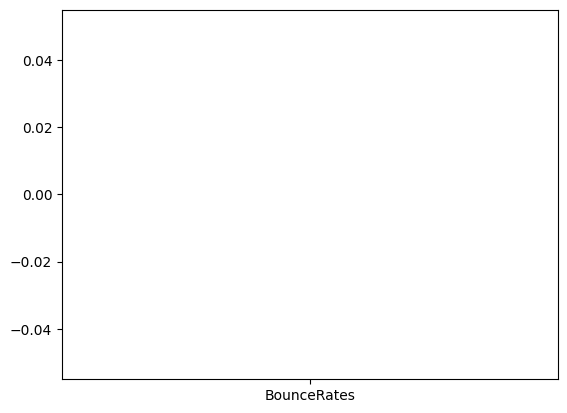

In [103]:
# Busca de valores atipicos
sns.boxplot(data=df[['BounceRates','ExitRates','PageValues']])


### Corelacion entre variables
Luego de las observaciones realizadas anteriormente vamos a analizar si contamos con columnas que pueden ser eliminadas o modificadas para ser de mayor provecho. Estas son:


*   OperatingSystems
*   Browser
*   Region
*   TrafficType
*   Informational vs Informational_Duration
*   ProductRelated vs ProductRelated_Duration
*   Administrative vs Administrative_Duration
*   VisitorType
*   Month


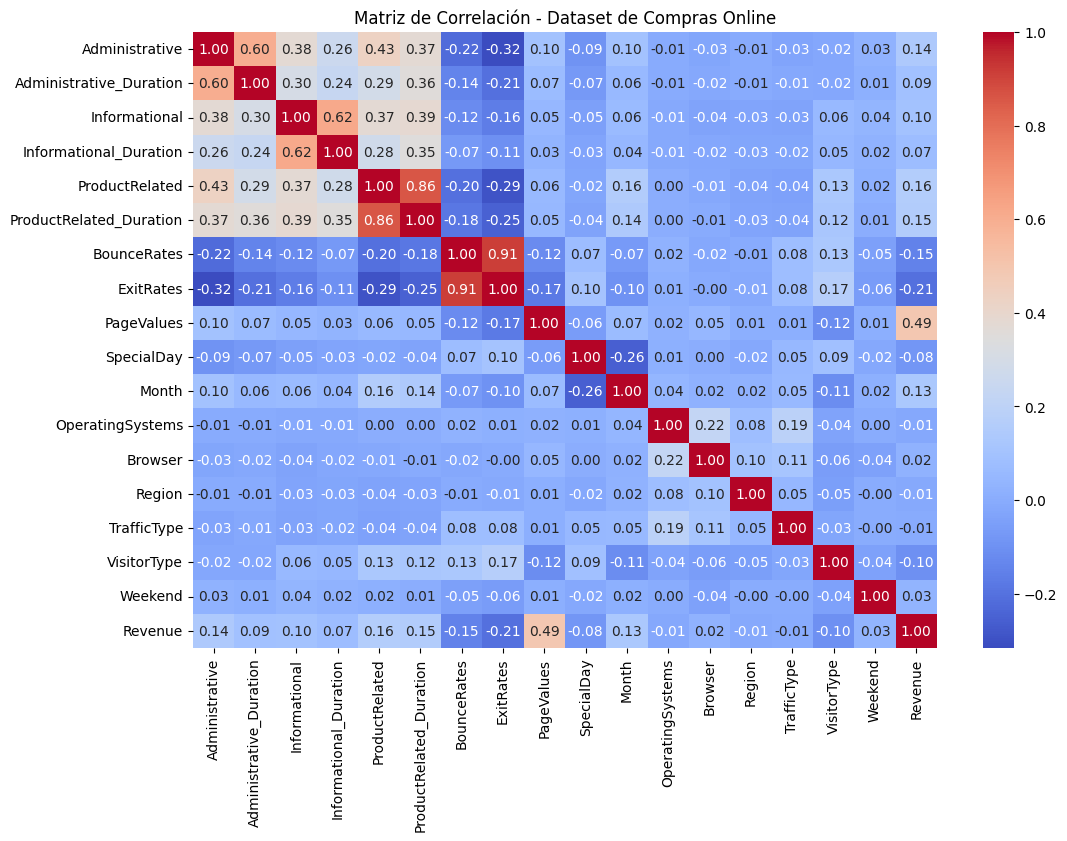

In [ ]:
# analizamos que varibles son realmente utiles
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación - Dataset de Compras Online")
plt.show()

Con la informacion que el heatmap nos presenta podemos justificar la eliminacion de ciertas columnas.
Como por ejemplo:
* Administrative ya que contiene informacion menos valiosa que Administrative_Duration. De manera que si administrative esta en cero sabemos que adminsitrative_duration tambien lo va a estar y en caso de que no sean cero, la informacion que vamos a usar va a estar en duration no en administrative. Lo mismo para Informational y para product related
* Columnas como OperatingSystems, Browser, Region, SpecialDay y TrafficType tienen muy baja correlación y no aportan informacion directa #####################Chequear con random Forest igual


In [ ]:
columns_to_drop= ['Administrative', 'Informational', 'ProductRelated', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'SpecialDay']
df = df.drop(columns=columns_to_drop)

print("Columnas finales para el modelo:")
df.columns

Columnas finales para el modelo:


Index(['Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'Month', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

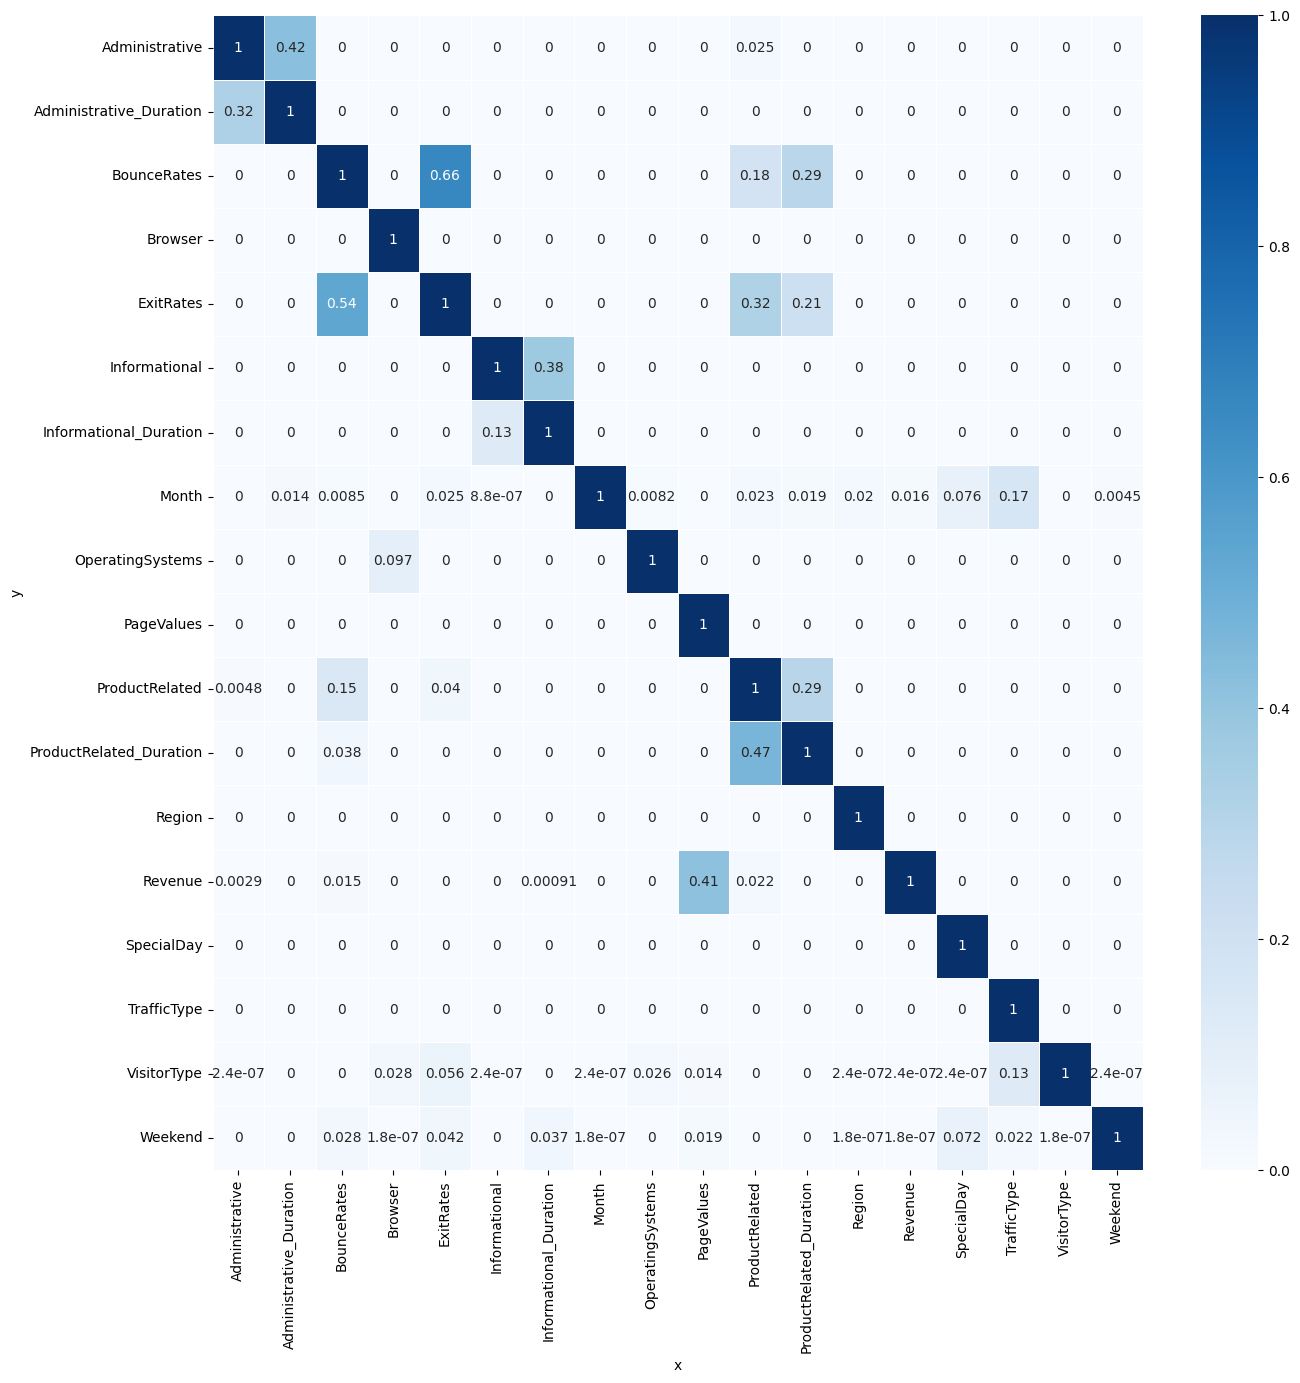

In [11]:

matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.show()

In [ ]:
# Check for correlation
corr = df.corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(13,13))
    sns.heatmap(ax=ax, data=corr, mask=mask, annot=True, center=0, vmin=-1, vmax=1, cmap="RdBu_r");
    fig.savefig('heatmap.png')

ValueError: could not convert string to float: 'Feb'

### Visualizaciones
histogramas, boxplots, heatmaps

In [105]:
df.hist(figsize=(50,40))

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [ ]:
g = sns.histplot(data = df, x = 'total')

<Axes: xlabel='Revenue', ylabel='PageValues'>

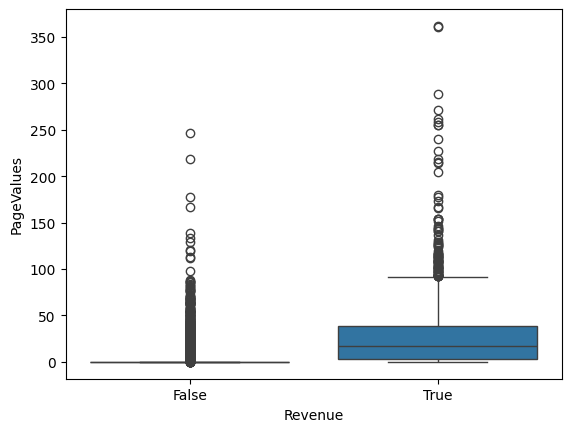

In [ ]:
sns.boxplot(x='Revenue', y='PageValues', data=df)


,proportion
Revenue,
False,0.845255
True,0.154745


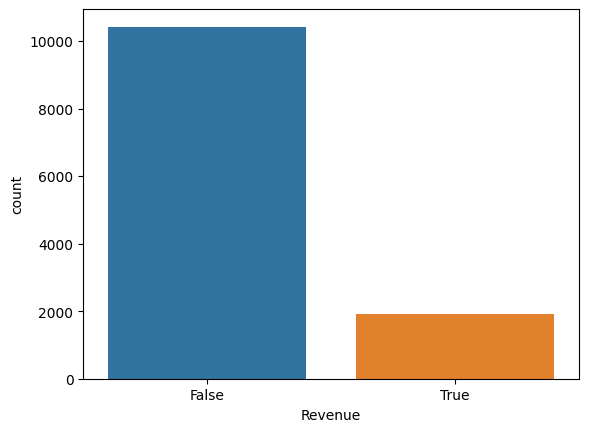

In [ ]:
# Distribucion de la variable target

sns.countplot(x='Revenue', data=df, hue='Revenue', legend=False)
df['Revenue'].value_counts(normalize=True)

Se puede ver que el data set esta altamente desbalanceado, tendremos que analizar que metricas conviene utilizar para la evaluacion del modelo y conciderar un posible rebalanceo

<Axes: xlabel='Month', ylabel='count'>

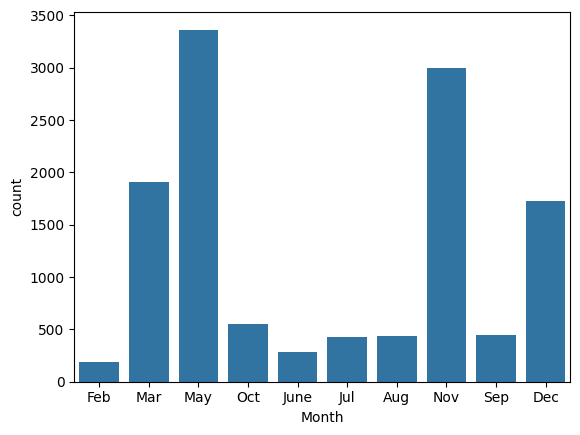

In [ ]:
sns.countplot(x='Month', data=df)
